In [18]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import numpy as np
from scripts.data import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.style.use('plot.mplstyle')
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
H_complete_cg_df, H_complete_a_df = get_complete_dataframes(energy_cutoff=1,im_linker='H')
CH3_complete_cg_df, CH3_complete_a_df = get_complete_dataframes(energy_cutoff=-5.7,im_linker='CH3')

In [63]:
ch3_ref_struct = get_reference_structure(linker_type='CH3')
h_ref_struct = get_reference_structure(linker_type='H')

In [64]:
ch3_ref_struct.info

{'energy_mofff': -30.787350292577226,
 'td_density': 3.1127803491626387,
 'RefCode': 'KUMXAS',
 'topology': 'dia',
 'space_group': 'I m a 2',
 'formula': 'C5 H6 N2 O2 Zn1',
 'Z': 1,
 'template': 'CH3',
 'supercells_built': 0,
 'date': '2023-06-19',
 'id': 'AB2_MOF_CH3_129',
 'scheme': 'd-rlx-cg-r-d',
 'batch': 3,
 'rattle_magnitude': 'small'}

In [65]:
h_ref_struct.info

{'energy_mofff': -5.056462919114871,
 'td_density': 5.860823276680397,
 'id': 'AB2_MOF-217'}

### Energy Distributions

In [27]:
all_H_energies = np.concatenate(get_energies(H_complete_cg_df,id_tags=H_complete_cg_df.columns,batches=H_rattled_batches)).reshape(-1,1)
all_methyl_energies = np.concatenate(get_energies(CH3_complete_cg_df,id_tags=CH3_complete_cg_df.columns,batches=CH3_rattled_batches)).reshape(-1,1)

In [28]:
H_scaler = StandardScaler()
H_scaler.fit(all_H_energies)
std_H_energies = H_scaler.transform(all_H_energies)

CH3_scaler = StandardScaler()
CH3_scaler.fit(all_methyl_energies)
std_me_energies = CH3_scaler.transform(all_methyl_energies)

([<matplotlib.axis.XTick at 0x32653aef0>,
 [Text(0, 0, 'Im'), Text(1, 0, 'mIm')])

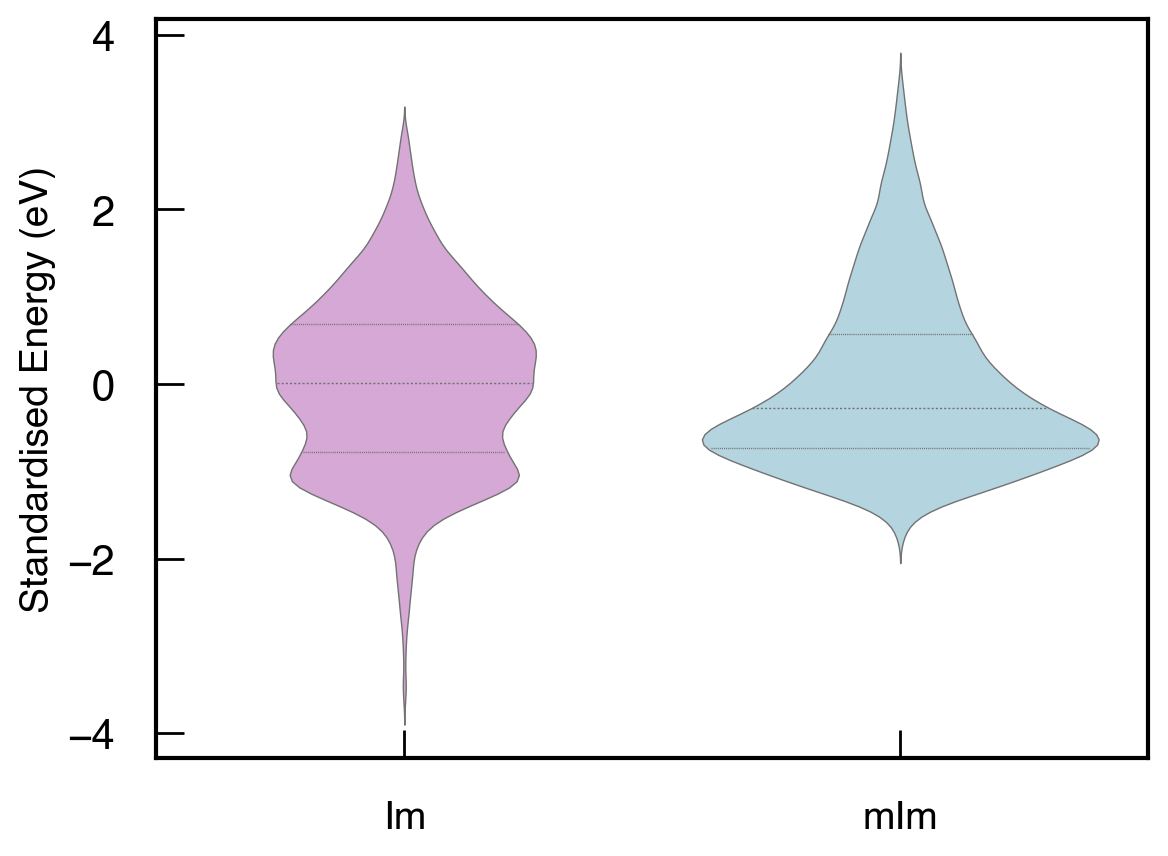

In [30]:
sns.violinplot(data=[std_H_energies,std_me_energies],linewidth=0.5, palette=['plum','lightblue'],inner='quartile')
plt.ylabel('Standardised Energy (eV)',fontsize=14)
plt.xticks([0,1],['Im','mIm'],fontsize=14)

In [35]:
H_df_mofs = get_all_data(MOF, coarse_grain=True,im_linker='H')
H_df_mofs,H_a_mofs = remove_high_energy_structures(H_df_mofs, energy_cutoff=1)
H_df_mofs = remove_null_columns(H_df_mofs)

H_df_zeolites = get_all_data(ZEOLITE, coarse_grain=True,im_linker='H')
H_df_zeolites,H_a_zeolites = remove_high_energy_structures(H_df_zeolites, energy_cutoff=1)
H_df_zeolites = remove_null_columns(H_df_zeolites)

In [36]:
H_rattled_zeolites = np.concatenate(get_energies(H_df_zeolites, id_tags=H_df_zeolites.columns,batches=H_rattled_batches))
H_rattled_mofs = np.concatenate(get_energies(H_df_mofs,id_tags=H_df_mofs.columns,batches=H_rattled_batches))

H_unrattled_zeolites = np.concatenate(get_energies(H_df_zeolites,id_tags=H_df_zeolites.columns,batches=[1]))
H_unrattled_mofs = np.concatenate(get_energies(H_df_mofs, id_tags=H_df_mofs.columns,batches=[1]))

Text(0.5, 1.0, 'Im Dataset Energy Distributions')

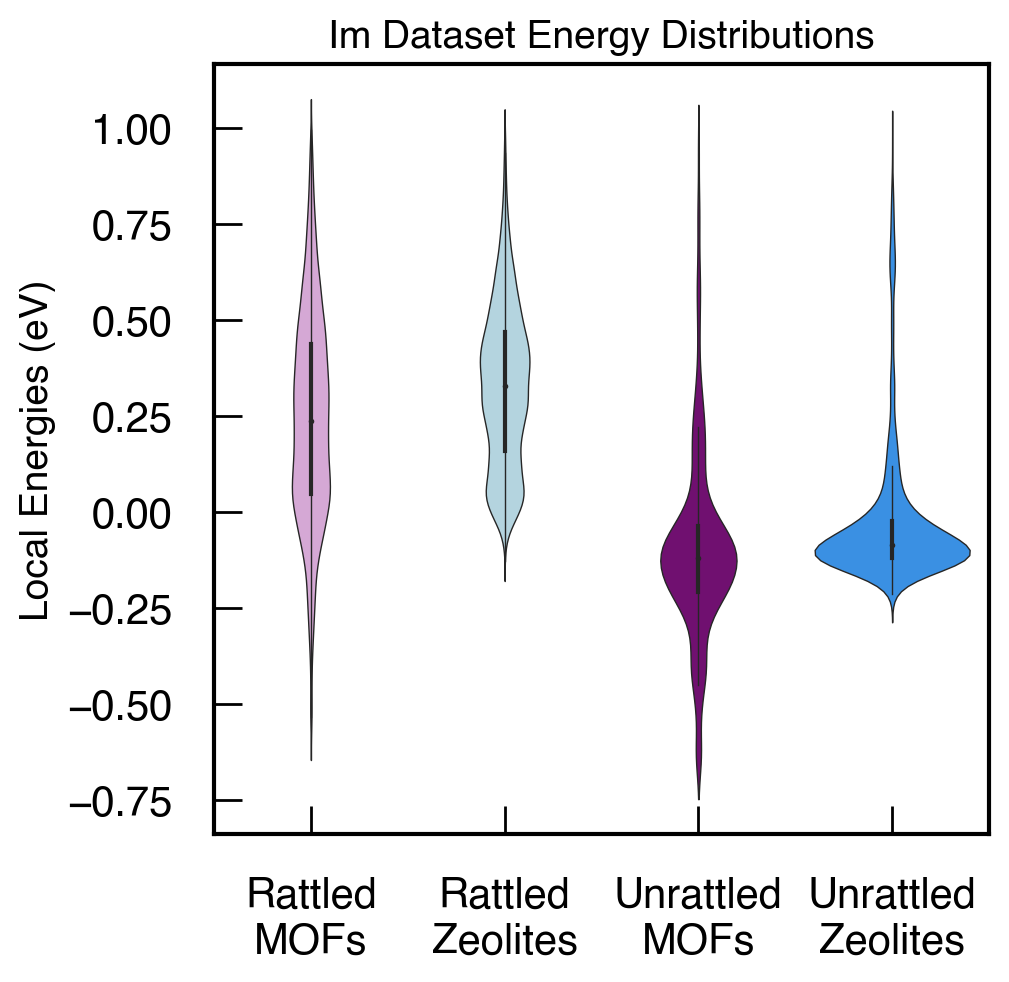

In [37]:
fig, ax = plt.subplots(figsize=(5,5))

sns.violinplot([H_rattled_mofs,H_rattled_zeolites,H_unrattled_mofs,H_unrattled_zeolites],linewidth=0.5, palette=['plum','lightblue','purple','dodgerblue'], ax=ax)
ax.set_xticklabels(['Rattled\nMOFs','Rattled\nZeolites','Unrattled\nMOFs','Unrattled\nZeolites'])
ax.set_ylabel('Local Energies (eV)',fontsize=14)
plt.title("Im Dataset Energy Distributions",fontsize=14)

In [38]:
df_mofs = get_all_data(MOF, coarse_grain=True,im_linker='CH3')
df_mofs,a_mofs = remove_high_energy_structures(df_mofs, energy_cutoff=1)
df_mofs = remove_null_columns(df_mofs)

df_zeolites = get_all_data(ZEOLITE, coarse_grain=True,im_linker='CH3')
df_zeolites,a_zeolites = remove_high_energy_structures(df_zeolites, energy_cutoff=1)
df_zeolites = remove_null_columns(df_zeolites)

In [39]:
rattled_zeolites = np.concatenate(get_energies(df_zeolites, id_tags=df_zeolites.columns,batches=CH3_rattled_batches))
rattled_mofs = np.concatenate(get_energies(df_mofs,id_tags=df_mofs.columns,batches=CH3_rattled_batches))

unrattled_zeolites = np.concatenate(get_energies(df_zeolites,id_tags=df_zeolites.columns,batches=[1]))
unrattled_mofs = np.concatenate(get_energies(df_mofs, id_tags=df_mofs.columns,batches=[1]))

Text(0.5, 1.0, 'mIm Dataset Energy Distributions')

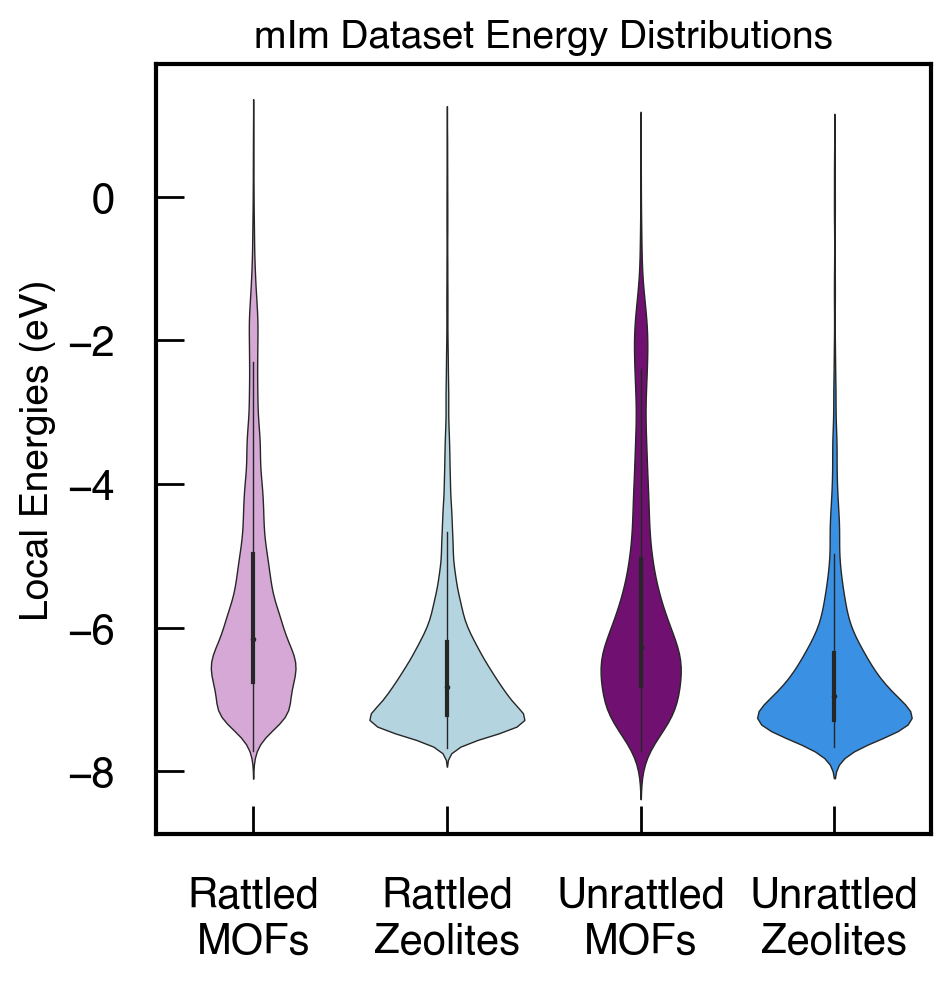

In [41]:
fig, ax = plt.subplots(figsize=(5,5))

sns.violinplot([rattled_mofs,rattled_zeolites,unrattled_mofs,unrattled_zeolites],linewidth=0.5, palette=['plum','lightblue','purple','dodgerblue'], ax=ax)
ax.set_xticklabels(['Rattled\nMOFs','Rattled\nZeolites','Unrattled\nMOFs','Unrattled\nZeolites'])
ax.set_ylabel('Local Energies (eV)',fontsize=14)
plt.title("mIm Dataset Energy Distributions",fontsize=14)

### Bond length distribution

In [42]:
all_H_structures = H_complete_a_df.values.flatten().tolist()
all_CH3_structures = CH3_complete_a_df.values.flatten().tolist()

all_H_structures = [s for s in all_H_structures if str(s) != 'nan']
all_CH3_structures = [s for s in all_CH3_structures if str(s) != 'nan']

In [43]:
import itertools

def generate_neighbour_triples(central_atom, neighbor_indices):
    triples = []
    for neighbor1, neighbor2 in itertools.combinations(neighbor_indices, 2):
        triples.append((neighbor1, central_atom, neighbor2))
    return triples

def generate_neighbour_doubles(central_atom, neighbor_indices):
    doubles = []
    for neighbor in neighbor_indices:
        doubles.append((central_atom, neighbor))
    return doubles

In [44]:
from ase import neighborlist

zn_angles = []
all_angles = []
zn_n_bond_lengths = []
all_bond_lengths = []

for struct in all_H_structures:
    nl = neighborlist.build_neighbor_list(struct,self_interaction=False)
    
    zn_atoms, = np.where(struct.get_atomic_numbers() == 30)
    
    for central_atom in range(len(struct)):
        neighbor_indices,_ = nl.get_neighbors(central_atom)
        triples = generate_neighbour_triples(central_atom, neighbor_indices)
        doubles = generate_neighbour_doubles(central_atom, neighbor_indices)

        for i in triples:
            a = struct.get_angle(*i, mic=True)
            all_angles.append(a)
            if central_atom in zn_atoms:
                zn_angles.append(a)
            
        for j in doubles:
            d = struct.get_distance(*j, mic=True)
            all_bond_lengths.append(d)
            if central_atom in zn_atoms:
                zn_n_bond_lengths.append(d)

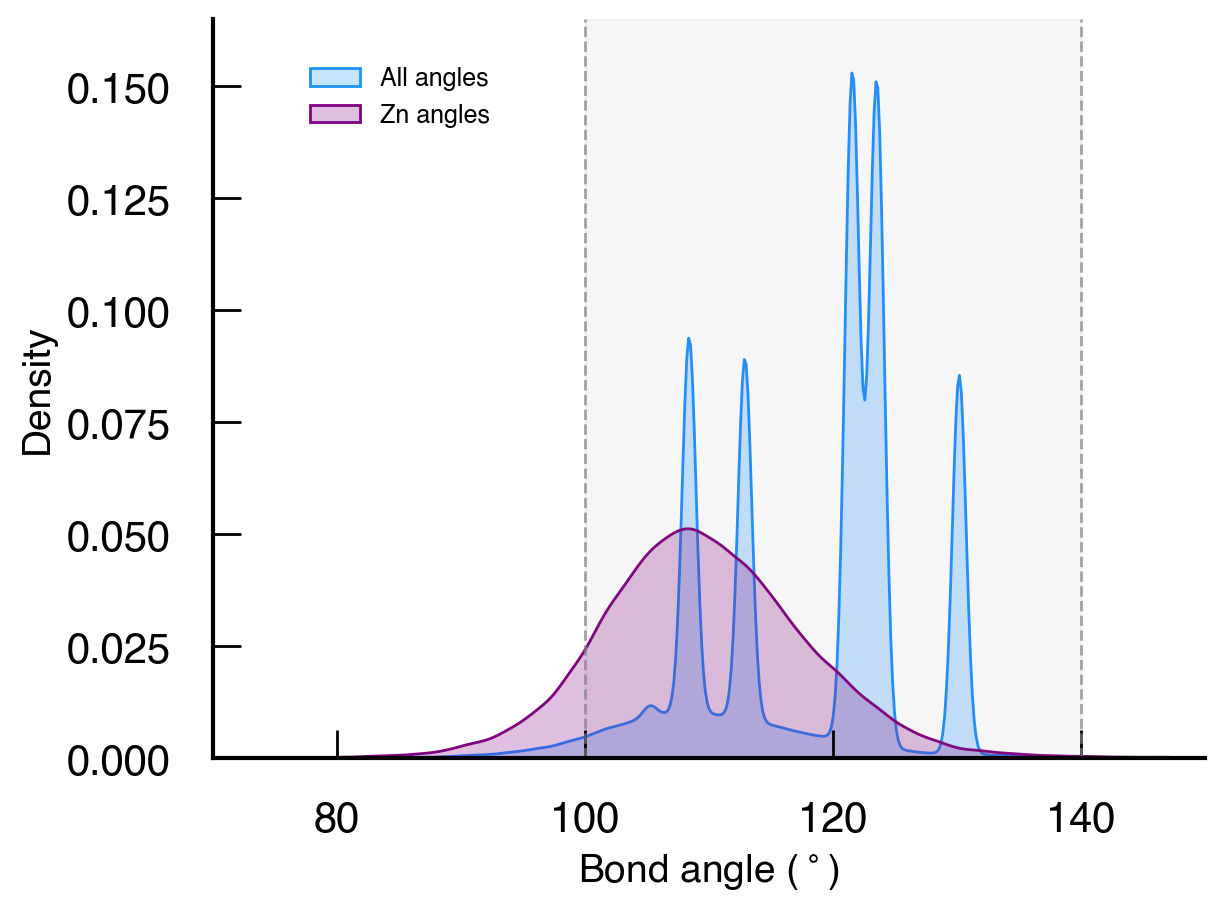

In [45]:
sns.kdeplot(all_angles,fill=True,color='dodgerblue',label='All angles',gridsize=1000)
sns.kdeplot(zn_angles,fill=True,color='purple',label='Zn angles',gridsize=1000)

plt.xlabel('Bond angle ($^\circ$)',fontsize=14)
plt.ylabel('Density',fontsize=14)

plt.xlim(70,150)

plt.vlines(100,0,0.165,linestyle='--',color='grey',alpha=0.7,linewidth=1)
plt.vlines(140,0,0.165,linestyle='--',color='grey',alpha=0.7,linewidth=1)
plt.ylim(0,0.165)
plt.legend(loc='upper left',fontsize=9,frameon=False,bbox_to_anchor=(0.05, 1))

# fill between the two horizontal lines
plt.fill_between([100,140],0,0.165,color='grey',alpha=0.07)
sns.despine()
# plt.savefig('../figures/angle_distributions.pdf',bbox_inches='tight')

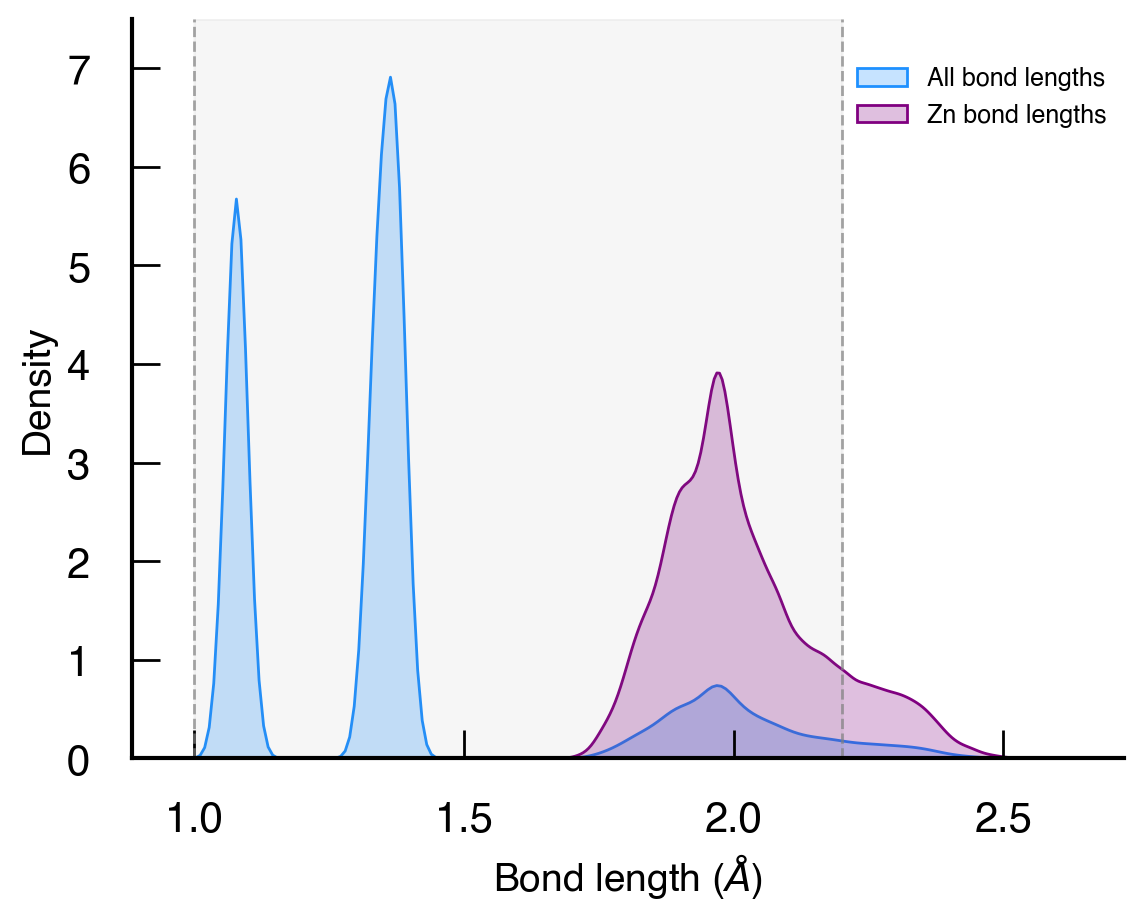

In [51]:
sns.kdeplot(all_bond_lengths,fill=True,color='dodgerblue',label='All bond lengths')
sns.kdeplot(zn_n_bond_lengths,fill=True,color='purple',label='Zn bond lengths')
plt.legend()

plt.xlabel('Bond length ($\AA$)',fontsize=14)
plt.ylabel('Density',fontsize=14)
# move legend to the right

plt.vlines(1.0,0,7.5,linestyle='--',color='grey',alpha=0.7,linewidth=1)
plt.vlines(2.2,0,7.5,linestyle='--',color='grey',alpha=0.7,linewidth=1)
plt.ylim(0,7.5)
plt.legend(loc='upper right',fontsize=9,bbox_to_anchor=(1.03, 1),frameon=False)

# fill between the two horizontal lines
plt.fill_between([1,2.2],0,7.5,color='grey',alpha=0.07)

# remove the top and right spines
sns.despine()
# plt.savefig('../figures/bond_length_distributions_noShading.pdf',bbox_inches='tight')

In [47]:
from ase import neighborlist

CH3_zn_angles = []
CH3_all_angles = []
CH3_zn_n_bond_lengths = []
CH3_all_bond_lengths = []

for struct in all_CH3_structures:
    nl = neighborlist.build_neighbor_list(struct,self_interaction=False)
    
    zn_atoms, = np.where(struct.get_atomic_numbers() == 30)
    
    for central_atom in range(len(struct)):
        neighbor_indices,_ = nl.get_neighbors(central_atom)
        triples = generate_neighbour_triples(central_atom, neighbor_indices)
        doubles = generate_neighbour_doubles(central_atom, neighbor_indices)

        for i in triples:
            a = struct.get_angle(*i, mic=True)
            CH3_all_angles.append(a)
            if central_atom in zn_atoms:
                CH3_zn_angles.append(a)
            
        for j in doubles:
            d = struct.get_distance(*j, mic=True)
            CH3_all_bond_lengths.append(d)
            if central_atom in zn_atoms:
                CH3_zn_n_bond_lengths.append(d)

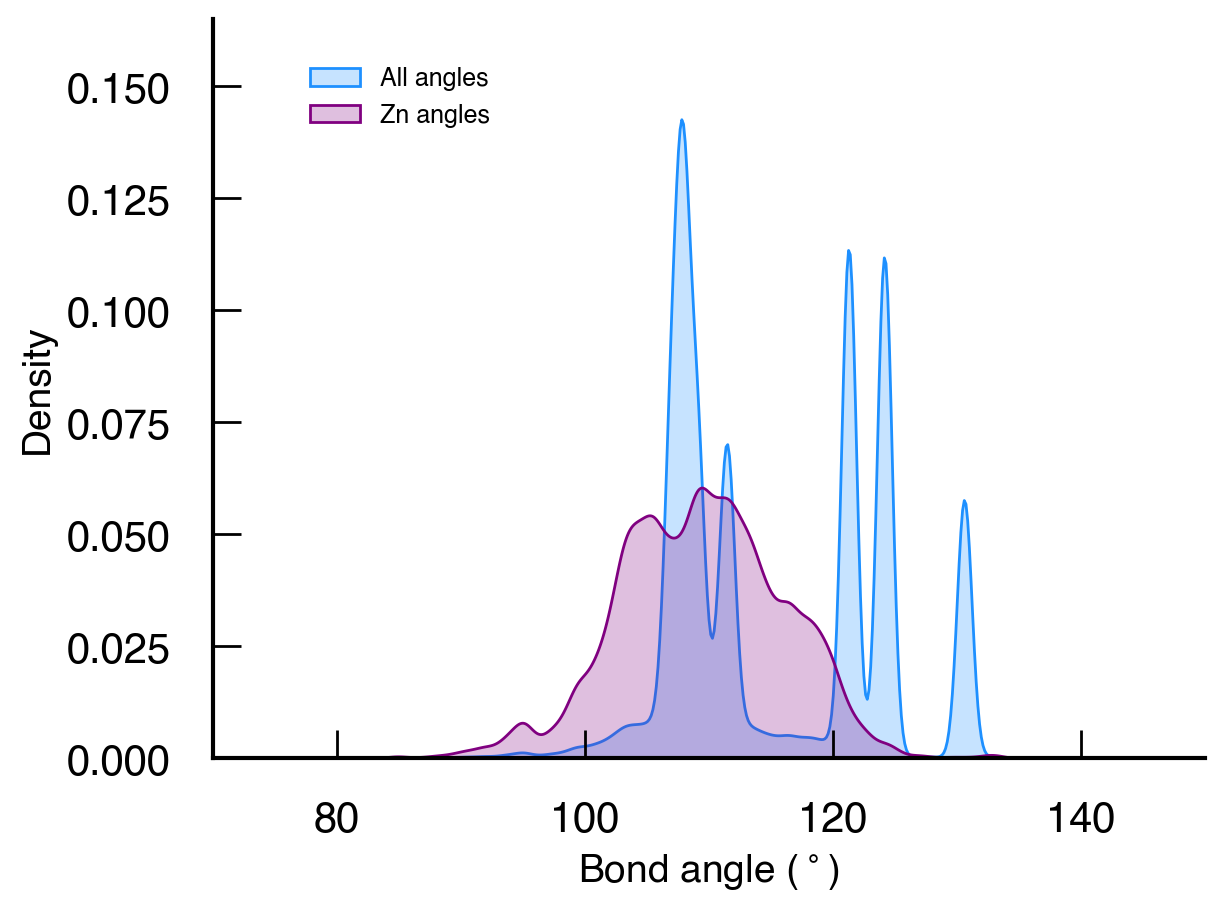

In [48]:
sns.kdeplot(CH3_all_angles,fill=True,color='dodgerblue',label='All angles',gridsize=1000)
sns.kdeplot(CH3_zn_angles,fill=True,color='purple',label='Zn angles',gridsize=1000)

plt.xlabel('Bond angle ($^\circ$)',fontsize=14)
plt.ylabel('Density',fontsize=14)

plt.xlim(70,150)

# plt.vlines(100,0,0.165,linestyle='--',color='grey',alpha=0.7,linewidth=1)
# plt.vlines(140,0,0.165,linestyle='--',color='grey',alpha=0.7,linewidth=1)
plt.ylim(0,0.165)
plt.legend(loc='upper left',fontsize=9,frameon=False,bbox_to_anchor=(0.05, 1))

# fill between the two horizontal lines
# plt.fill_between([100,140],0,0.165,color='grey',alpha=0.07)
sns.despine()
# plt.savefig('../figures/angle_distributions.pdf',bbox_inches='tight')

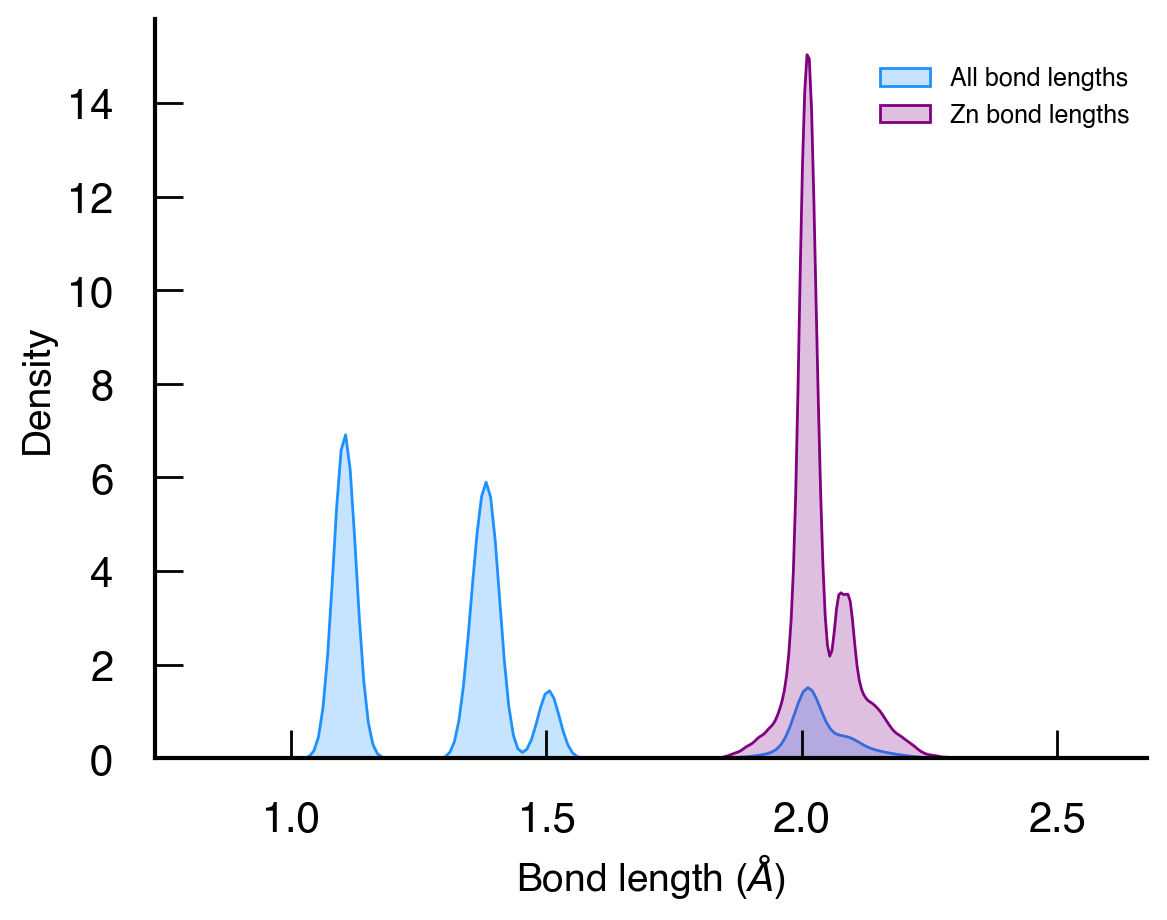

In [50]:
sns.kdeplot(CH3_all_bond_lengths,fill=True,color='dodgerblue',label='All bond lengths')
sns.kdeplot(CH3_zn_n_bond_lengths,fill=True,color='purple',label='Zn bond lengths')
plt.legend()

plt.xlabel('Bond length ($\AA$)',fontsize=14)
plt.ylabel('Density',fontsize=14)
# move legend to the right

# plt.vlines(1.0,0,7.5,linestyle='--',color='grey',alpha=0.7,linewidth=1)
# plt.vlines(2.2,0,7.5,linestyle='--',color='grey',alpha=0.7,linewidth=1)
# plt.ylim(0,7.5)
plt.legend(loc='upper right',fontsize=9,bbox_to_anchor=(1.03, 1),frameon=False)

# fill between the two horizontal lines
# plt.fill_between([1,2.2],0,7.5,color='grey',alpha=0.07)

# remove the top and right spines
sns.despine()
# plt.savefig('../figures/bond_length_distributions_noShading.pdf',bbox_inches='tight')

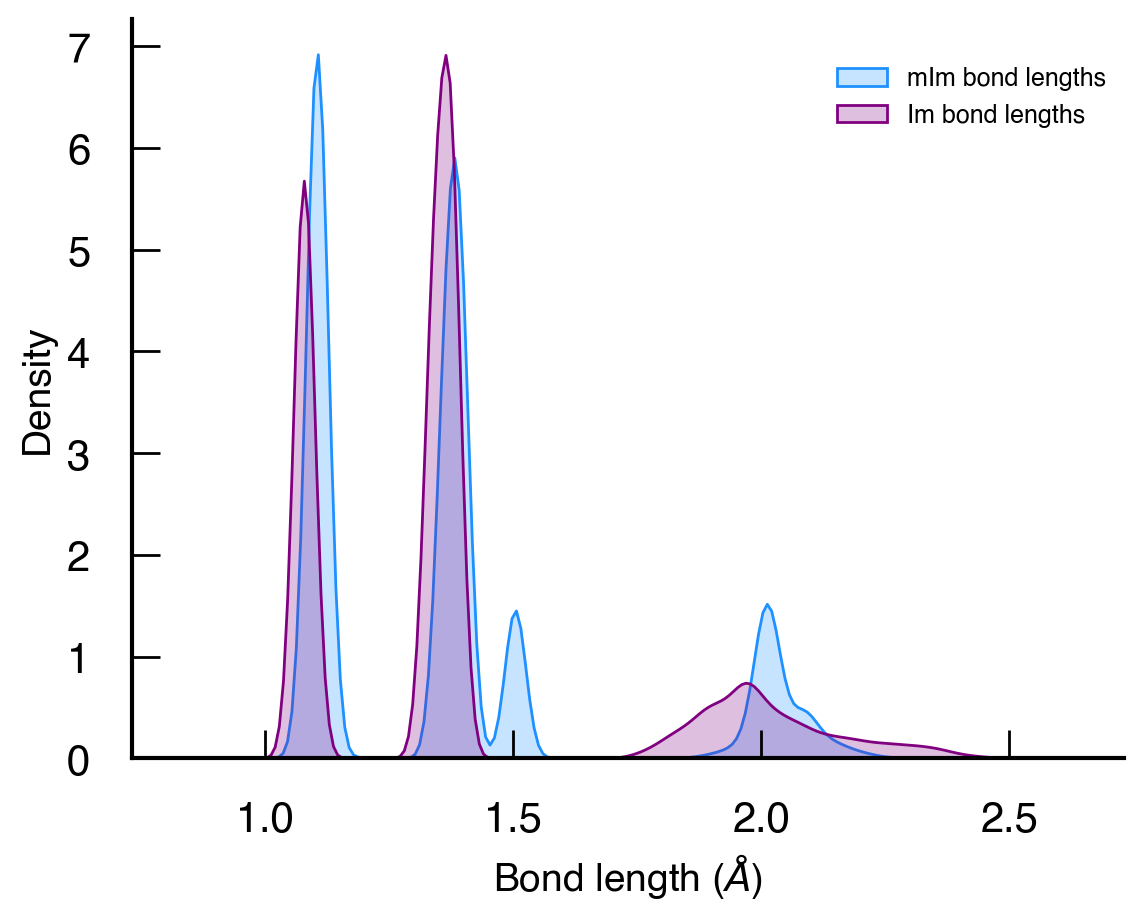

In [52]:
sns.kdeplot(CH3_all_bond_lengths,fill=True,color='dodgerblue',label='mIm bond lengths')
sns.kdeplot(all_bond_lengths,fill=True,color='purple',label='Im bond lengths')
plt.legend()

plt.xlabel('Bond length ($\AA$)',fontsize=14)
plt.ylabel('Density',fontsize=14)
# move legend to the right

# plt.vlines(1.0,0,7.5,linestyle='--',color='grey',alpha=0.7,linewidth=1)
# plt.vlines(2.2,0,7.5,linestyle='--',color='grey',alpha=0.7,linewidth=1)
# plt.ylim(0,7.5)
plt.legend(loc='upper right',fontsize=9,bbox_to_anchor=(1.03, 1),frameon=False)

# fill between the two horizontal lines
# plt.fill_between([1,2.2],0,7.5,color='grey',alpha=0.07)

# remove the top and right spines
sns.despine()
# plt.savefig('../figures/bond_length_distributions_noShading.pdf',bbox_inches='tight')

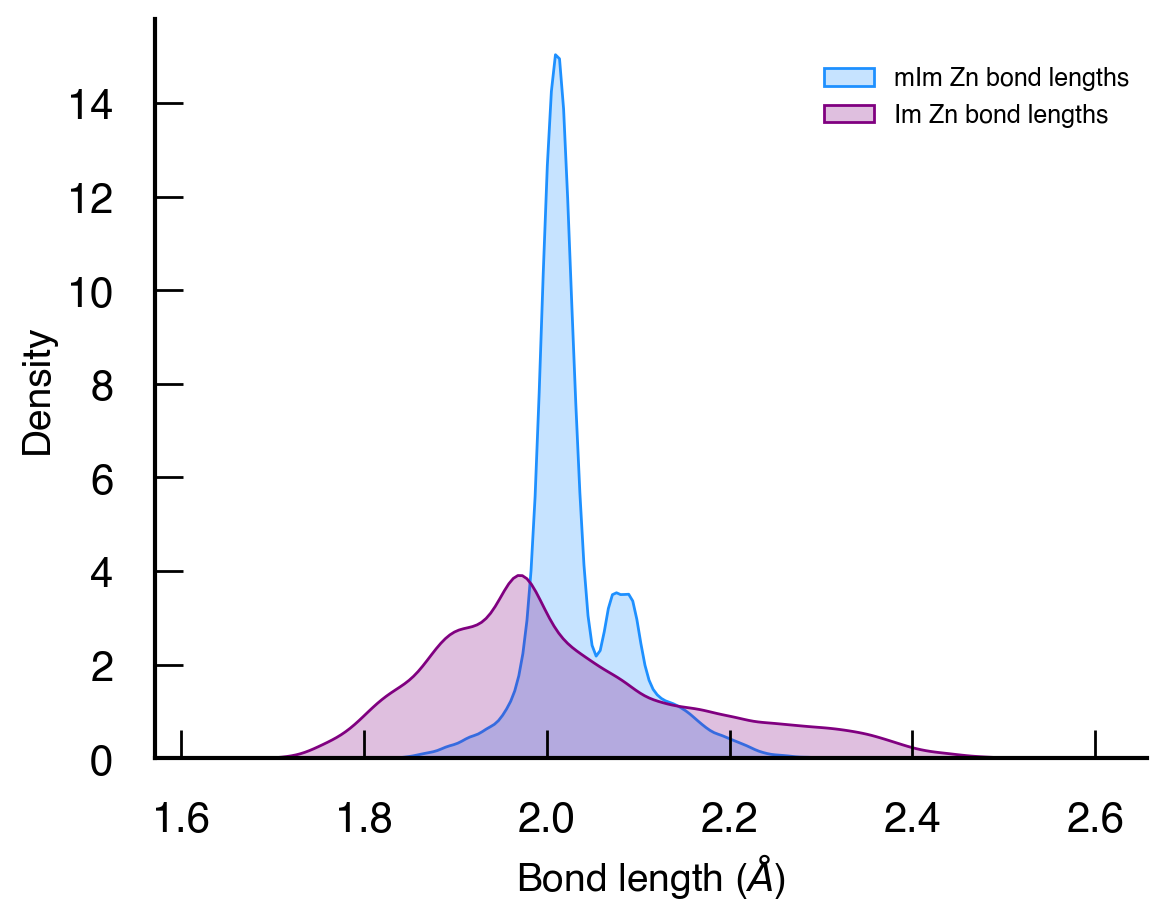

In [53]:
sns.kdeplot(CH3_zn_n_bond_lengths,fill=True,color='dodgerblue',label='mIm Zn bond lengths')
sns.kdeplot(zn_n_bond_lengths,fill=True,color='purple',label='Im Zn bond lengths')
plt.legend()

plt.xlabel('Bond length ($\AA$)',fontsize=14)
plt.ylabel('Density',fontsize=14)
# move legend to the right

# plt.vlines(1.0,0,7.5,linestyle='--',color='grey',alpha=0.7,linewidth=1)
# plt.vlines(2.2,0,7.5,linestyle='--',color='grey',alpha=0.7,linewidth=1)
# plt.ylim(0,7.5)
plt.legend(loc='upper right',fontsize=9,bbox_to_anchor=(1.03, 1),frameon=False)

# fill between the two horizontal lines
# plt.fill_between([1,2.2],0,7.5,color='grey',alpha=0.07)

# remove the top and right spines
sns.despine()
# plt.savefig('../figures/bond_length_distributions_noShading.pdf',bbox_inches='tight')

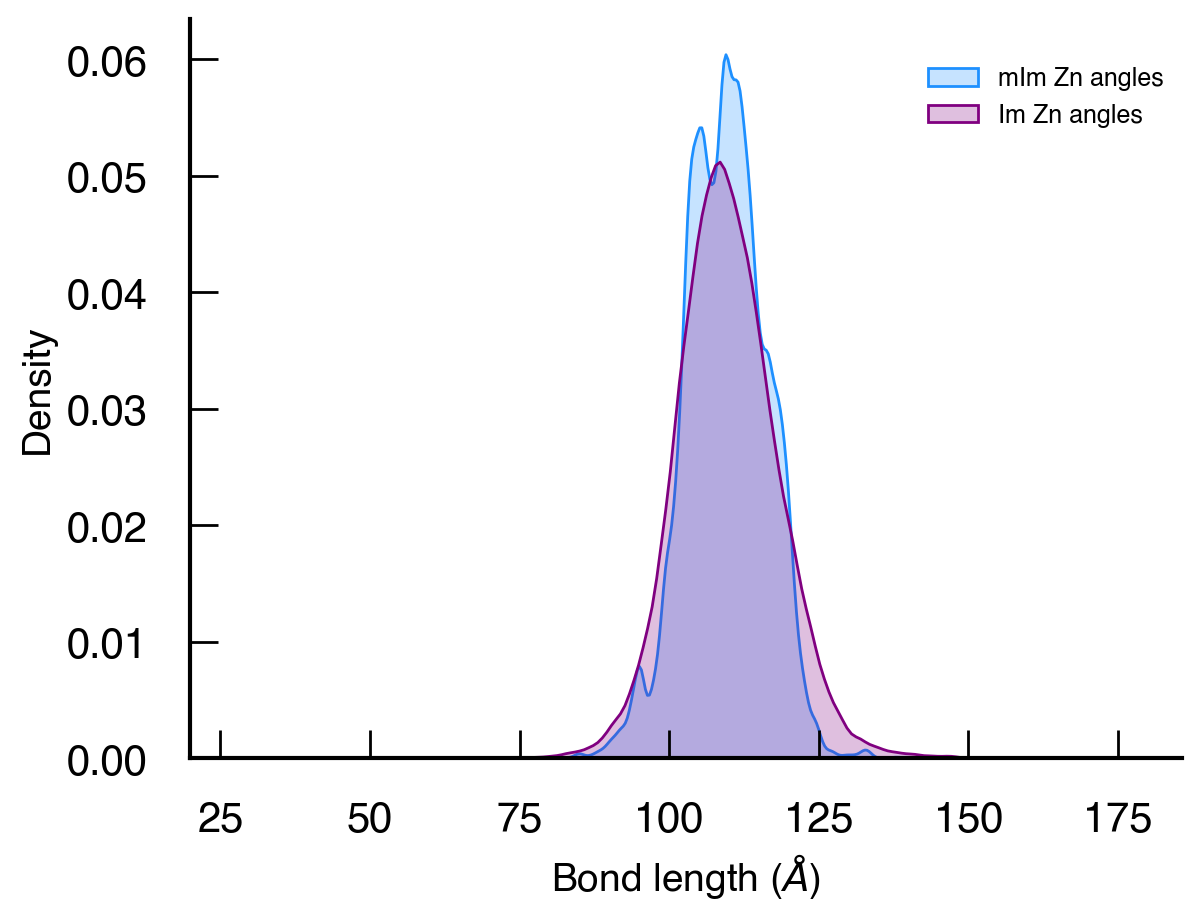

In [54]:
sns.kdeplot(CH3_zn_angles,fill=True,color='dodgerblue',label='mIm Zn angles')
sns.kdeplot(zn_angles,fill=True,color='purple',label='Im Zn angles')
plt.legend()

plt.xlabel('Bond length ($\AA$)',fontsize=14)
plt.ylabel('Density',fontsize=14)
# move legend to the right

# plt.vlines(1.0,0,7.5,linestyle='--',color='grey',alpha=0.7,linewidth=1)
# plt.vlines(2.2,0,7.5,linestyle='--',color='grey',alpha=0.7,linewidth=1)
# plt.ylim(0,7.5)
plt.legend(loc='upper right',fontsize=9,bbox_to_anchor=(1.03, 1),frameon=False)

# fill between the two horizontal lines
# plt.fill_between([1,2.2],0,7.5,color='grey',alpha=0.07)

# remove the top and right spines
sns.despine()
# plt.savefig('../figures/bond_length_distributions_noShading.pdf',bbox_inches='tight')